In [3]:
# Med inspiration från YouTube video tutorial
# Classificering av hundar och Katter från bilder 
# An updated deep learning introduction using Python, TensorFlow, and Keras
# 
#

path = 'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\CatTrain'
category = 'CatTrain'
img = '1.jpeg'
[[ 96  71  67 ... 198 199 200]
 [ 83  67  69 ... 195 196 197]
 [ 61  58  68 ... 192 193 194]
 ...
 [ 85  70  73 ...  79  91  95]
 [ 85  73  70 ...  70  80  92]
 [ 85  74  70 ...  72  83  96]]


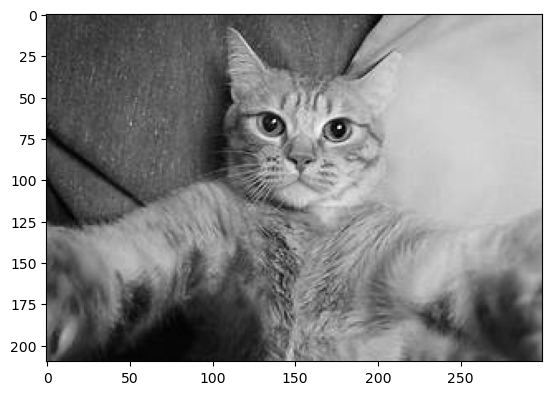

In [109]:
import numpy as np                   # för array matrix operationer
import matplotlib.pyplot as plt      # för att visualisera data
import os                            # för att iterera genom bibliotek med bilder

#pip install opencv-python
import cv2                           # för att uföra image operationer



#pip install --upgrade tensorflow
#import tensorflow as tf
#tf.__version__


#os.path


IMG_SIZE = 75

#DATADIR = pwd
#DATADIR = "C:\\Users\\larth\\PythUtb\\InlUppg_2\\prep\\VideoTutorial_Cat_Dog\\"
DATADIR = "C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\"                                      # path till katalog med djurbilder
#DATADIR_MOD = DATADIR + "pyth_mod_learn\\"                                         # path till sparad modell
DATADIR_MOD = DATADIR                                         # path till sparad modell

#CATEGORIES = ["500pCats", "500pDogs"]
#CATEGORIES = ["CatTrain", "DogTrain"]
CATEGORIES_TRAIN = ["CatTrain", "DogTrain"]
CATEGORIES_TEST = ["CatTest", "DogTest"]
#CATEGORIES = ["Cat", "Dog"]

# Ska titta på ett första foto
for category in CATEGORIES_TRAIN:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)      # Väljer att endast hantera gråskalebilder
        print(f"{path = }")
        print(f"{category = }")
        print(f"{img = }")
        print(img_array)
        plt.imshow(img_array, cmap="grey")
        plt.show()
        #pause
        break
    break      # För att stanna vid 1:a fotot




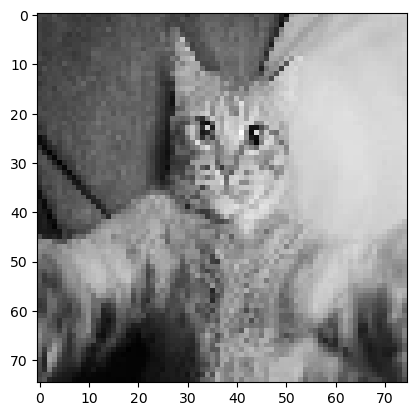

In [58]:
# IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="grey")
plt.show()


In [6]:
## IMG_SIZE = 150
#new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array, cmap="grey")
#plt.show()


In [60]:

# Grundläggande kontroll på bildstorlek vad gäller pxl-antal, storlek och formfaktor
# Vilken upplösning (pxl) har bilderna i aktuella kataloger
# För att formatet på bilderna inte ska sänka metoden

vecRC = []   # vector med antal Rader & Columner
to_small_pic = 0

for category in CATEGORIES_TRAIN:
    path = os.path.join(DATADIR, category)  # path till katter och hundar
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            #print(f"{img_array.shape = }       {img_array.size = }       {len(img_array) = }  ")
            if img_array[0,0]<(IMG_SIZE+1):
                to_small_pic += 1
                #print(f"{img_array[0,0] = }")
            elif img_array[0,1]<(IMG_SIZE+1):
                to_small_pic += 1
                #print(f"{img_array[0,1] = }")
            else:
                vecRC.append(img_array.shape)
        except Exceptin as e:
            print(e)
            print(path)
            
        #break
    #break
    

vecRC = np.array(vecRC)  # behöver np-formatet på vectorn för att enkelt få fram innehåll

print(f"{vecRC.shape = }       {vecRC.size = }       {len(vecRC) = }       {len(vecRC[:,0]) = }       {len(vecRC[:,1]) = }  ")
print(f"Number of pictures that was too small: {to_small_pic}")



vecRC.shape = (5436, 2)       vecRC.size = 10872       len(vecRC) = 5436       len(vecRC[:,0]) = 5436       len(vecRC[:,1]) = 5436  
Number of pictures that was too small: 2264


max(vecRC[:,0]) = 2287       min(vecRC[:,0]) = 75       max(vecRC[:,1]) = 4288       min(vecRC[:,1]) = 107
max(vecRC[:,0]/vecRC[:,1]) = 1.9607843137254901       min(vecRC[:,0]/vecRC[:,1]) = 0.33666666666666667 
max(vecRC[:,1]/vecRC[:,0]) = 2.9702970297029703       min(vecRC[:,1]/vecRC[:,0]) = 0.51 


Text(1.0934581088727429, 3378.6, '$\\bar{x}$')

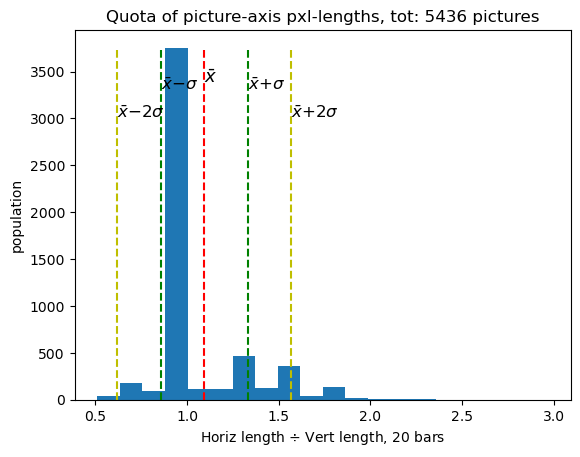

In [62]:
# Kontrollera att det är rimligt antal pxl-värden på första 15 bilderna
[vecRC[:10,0], vecRC[:10,1]]


# max och min värden på pxl antal för alla aktuella bilder samt formfaktor
print(f"{max(vecRC[:,0]) = }       {min(vecRC[:,0]) = }       {max(vecRC[:,1]) = }       {min(vecRC[:,1]) = }")
print(f"{max(vecRC[:,0]/vecRC[:,1]) = }       {min(vecRC[:,0]/vecRC[:,1]) = } ")
print(f"{max(vecRC[:,1]/vecRC[:,0]) = }       {min(vecRC[:,1]/vecRC[:,0]) = } ")


NumOfBins = 20
yx_mat = plt.hist( (vecRC[:,1]/vecRC[:,0]), bins=NumOfBins)

mv = (vecRC[:,1]/vecRC[:,0]).mean()
sv = (vecRC[:,1]/vecRC[:,0]).std()
ymin = min(yx_mat[0])
ymax = max(yx_mat[0])
y10part = (ymax-ymin)/10

plt.plot([mv, mv], [ymin, ymax], 'r--')
plt.plot([mv-sv, mv-sv], [ymin, ymax], 'g--')
plt.plot([mv+sv, mv+sv], [ymin, ymax], 'g--')
plt.plot([mv-2*sv, mv-2*sv], [ymin, ymax], 'y--')
plt.plot([mv+2*sv, mv+2*sv], [ymin, ymax], 'y--')
plt.title(f"Quota of picture-axis pxl-lengths, tot: {len(vecRC)} pictures")
plt.xlabel(f"Horiz length $\\div$ Vert length, {NumOfBins} bars")
plt.ylabel("population")

plt.text(mv-2*sv, ymax-2*y10part, (r'$\bar{x}$' + '$ \\minus 2\\sigma$'), size=12)
plt.text(mv+2*sv, ymax-2*y10part, (r'$\bar{x}$' + '$ \\plus 2\\sigma$'), size=12)

plt.text(mv-sv, ymax-1.2*y10part, (r'$\bar{x}$' + '$ \\minus \\sigma$'), size=12)
plt.text(mv+sv, ymax-1.2*y10part, (r'$\bar{x}$' + '$ \\plus \\sigma$'), size=12)

plt.text(mv, ymax-y10part, r'$\bar{x}$', size=13)




In [9]:
#
# SLUTSATS :: minsta bildsida: 75 pxl  -->> kan utföra metodutveckling på bilder med IMG_SIZE = 75
#          :: Ska ändra storlek hos bilderna så att all erhåller exakt samma storlek i bredd & höjd
#             transformerar X-/Y-antalet pixlar till IMG_SIZE --> kvadratisk form
#             transformationen kommer leda till irreparabel förändring i bredd-/höjdförhållandet
#             förhoppningsvis skall denna transformation inte förstöra möjlighet till stark AI-modell
#

In [66]:
# -- obs. bara test här, låt IMG_SIZE bli definierad vid start
# IMG_SIZE = 100

training_data = []

def create_training_data():
    for category in CATEGORIES_TRAIN:
        path = os.path.join(DATADIR, category)                                          # path till katter och hundar
        class_num = CATEGORIES_TRAIN.index(category)                                          # Aktuell djur-nuffra
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)   # Behåller endast gråskalevärde på bildinnehåll
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))                 # Komprimerande transformering av bild
                training_data.append([new_array, class_num])                            # [  [bild-nuffror], [djur-nuffra]  ]
            except Exception as e:
                print(e)
                pass


create_training_data()


print(f"  {len(training_data)  =  }   ")


  len(training_data)  =  7700   


In [71]:
# Skyffla runt datat så att katter & hundar beblandas i tensorn

import random
random.shuffle(training_data)

In [73]:
# Kontrollera hur "categorie" har blandats hos de tio första - katt '0', hund '1'

for sample in training_data[:10]:
    print(sample[1])

# training_data

0
1
1
1
1
0
1
1
1
0


In [83]:
# Input X, output y

X_train = []
y_train = []

In [85]:
# Skapar listor med numeriska värde på in-/utdata, som används att skapa numpy tensorerna
# Tensorerna agerar container för indatat och utdatat, samt erhåller trevliga numeriska funktioner

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

# Båda tensorerna behöver samma format för senare behandling
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train).reshape((len(y_train), 1))


In [87]:
# Flusha dataström till disk, att representera in-/utdata

import pickle

TxT_inp_fileN = DATADIR_MOD + "X_train.pickle"
TxT_out_fileN = DATADIR_MOD + "y_train.pickle"

print(TxT_inp_fileN)
print(TxT_out_fileN)

pickle_out = open(TxT_inp_fileN,"wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open(TxT_out_fileN,"wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


C:\LTH_data\photo\PythUtbPic\SKARP\X_train.pickle
C:\LTH_data\photo\PythUtbPic\SKARP\y_train.pickle


In [91]:
print(f"{X_train.shape = }           {X_train.size = }           {len(X_train) = }       ")
print(f"{y_train.shape = }           {y_train.size = }           {len(y_train) = }       ")


X_train.shape = (7700, 75, 75, 1)           X_train.size = 43312500           len(X_train) = 7700       
y_train.shape = (7700, 1)           y_train.size = 7700           len(y_train) = 7700       


In [93]:
print(f"{type(X_train) = }       {type(y_train) = }    ")


type(X_train) = <class 'numpy.ndarray'>       type(y_train) = <class 'numpy.ndarray'>    


In [95]:
# Testa att läsa

pickle_in = open(TxT_inp_fileN,"rb")
X = pickle.load(pickle_in)
pickle_in.close()

In [97]:
X.shape

(7700, 75, 75, 1)

In [21]:
# y

In [99]:
print(f"{X_train.shape = }       {X_train.size = }       {len(X_train) = }       {len(y_train) = }       ")

X_train.shape = (7700, 75, 75, 1)       X_train.size = 43312500       len(X_train) = 7700       len(y_train) = 7700       


In [101]:
print(f"{type(X_train) = }       {type(y_train) = }    ")

type(X_train) = <class 'numpy.ndarray'>       type(y_train) = <class 'numpy.ndarray'>    


In [105]:
# Kontrollera hur "categorie" har blandats mellan katt '0', hund '1'

sample_0 = 0
sample_1 = 0
#for sample in training_data[:10]:
for sample in training_data[:]:
    if sample[1] < 0.5:
        sample_0 += 1
    elif sample[1] > 0.5:
        sample_1 += 1
    #print(sample[1])

print(f"\tAntal tränings-bilder med katter i samplet: {sample_0 = }")
print(f"\tAntal tränings-bilder med hundar i samplet: {sample_1 = }")


	Antal tränings-bilder med katter i samplet: sample_0 = 3500
	Antal tränings-bilder med hundar i samplet: sample_1 = 4200


In [129]:
#
# Motsvarande förberedelser på datainnehåll för test-data
#

test_data = []

def create_test_data():
    for category in CATEGORIES_TEST:
        path = os.path.join(DATADIR, category)                                          # path till katter och hundar
        class_num = CATEGORIES_TEST.index(category)                                          # Aktuell djur-nuffra
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)   # Behåller endast gråskalevärde på bildinnehåll
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))                 # Komprimerande transformering av bild
                test_data.append([new_array, class_num])                            # [  [bild-nuffror], [djur-nuffra]  ]
            except Exception as e:
                print(e)
                pass


create_test_data()


print(f"  {len(test_data)  =  }   ")


# Skyffla runt datat så att katter & hundar beblandas i tensorn
# import random
random.shuffle(test_data)






  len(test_data)  =  880   


In [131]:
# Kontrollera hur "categorie" har blandats hos de tio första - katt '0', hund '1'

for sample in test_data[:10]:
    print(sample[1])

# test_data

1
0
1
0
1
1
0
0
0
0


In [133]:
# Input X, output y

X_test = []
y_test = []


# Skapar listor med numeriska värde på in-/utdata, som används att skapa numpy tensorerna
# Tensorerna agerar container för indatat och utdatat, samt erhåller trevliga numeriska funktioner

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

# Båda tensorerna behöver samma format för senare behandling
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test).reshape((len(y_test), 1))

# Flusha dataström till disk, att representera in-/utdata
#import pickle

TxT_inp_fileN = DATADIR_MOD + "X_test.pickle"
TxT_out_fileN = DATADIR_MOD + "y_test.pickle"

print(TxT_inp_fileN)
print(TxT_out_fileN)

pickle_out = open(TxT_inp_fileN,"wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open(TxT_out_fileN,"wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()



C:\LTH_data\photo\PythUtbPic\SKARP\X_test.pickle
C:\LTH_data\photo\PythUtbPic\SKARP\y_test.pickle


In [135]:

print(f"{X_train.shape = }           {X_train.size = }           {len(X_train) = }       ")
print(f"{y_train.shape = }           {y_train.size = }           {len(y_train) = }       ")

print(f"{type(X_train) = }       {type(y_train) = }    ")


X_train.shape = (7700, 75, 75, 1)           X_train.size = 43312500           len(X_train) = 7700       
y_train.shape = (7700, 1)           y_train.size = 7700           len(y_train) = 7700       
type(X_train) = <class 'numpy.ndarray'>       type(y_train) = <class 'numpy.ndarray'>    


In [137]:
# Testa att läsa

pickle_in = open(TxT_inp_fileN,"rb")
X = pickle.load(pickle_in)
pickle_in.close()

X.shape


(880, 75, 75, 1)

In [139]:
# Kontrollera hur "categorie" har blandats mellan katt '0', hund '1'

sample_0 = 0
sample_1 = 0
#for sample in test_data[:10]:
for sample in test_data[:]:
    if sample[1] < 0.5:
        sample_0 += 1
    elif sample[1] > 0.5:
        sample_1 += 1
    #print(sample[1])

print(f"\tAntal test-bilder med katter i samplet: {sample_0 = }")
print(f"\tAntal test-bilder med hundar i samplet: {sample_1 = }")


	Antal test-bilder med katter i samplet: sample_0 = 400
	Antal test-bilder med hundar i samplet: sample_1 = 480
